# 0) configure 'findspark'

In [1]:
import findspark

In [2]:
spark_home = "/Users/romainjouin/Downloads/spark-3.1.2-bin-hadoop3.2"
findspark.init(spark_home=spark_home)

# 1) configure spark

In [3]:
from pyspark         import SparkConf
from pyspark.context import SparkContext
from pyspark.sql     import SparkSession

## 1.1) création d'une configuration

In [4]:
master_url = "spark://romainjouin-macbookpro1.roam.corp.google.com:7077"
nb_cpu     = 6
App_name   = "Nom de l'application" 
spark_executor_memory   = "8g"
spark_serializer        = "org.apache.spark.serializer.KryoSerializer"


[Propriétés de Spark](https://spark.apache.org/docs/latest/configuration.html#available-properties)

In [5]:
conf = SparkConf()
conf = conf.setMaster(master_url)
conf = conf.set("spark.cores.max", nb_cpu)
conf = conf.set("spark.executor.memory",   spark_executor_memory)
conf = conf.set("spark.serializer",        spark_serializer)

conf = conf.setAppName(App_name)

## 1.2) creation d'un spark context

In [6]:
# on ne peut avoir qu'un seul spark context => on le supprime au cas ou, avant de le recréer
try    : sc.stop()
except : pass

In [7]:
sc = SparkContext(conf=conf)

In [8]:
sc

<SparkContext master=spark://romainjouin-macbookpro1.roam.corp.google.com:7077 appName=Nom de l'application>

## 1.3) récupération de la spark session

In [9]:
spark = SparkSession.builder.getOrCreate()
spark

# 2) manipulation des dataframes (chapitre 6 du livre, p110)

## 2.0) télécharger le fichier csv à la main 

In [21]:
!curl -O https://raw.githubusercontent.com/romainjouin/livre_spark/master/data/Villes/ville_1.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  157k  100  157k    0     0   261k      0 --:--:-- --:--:-- --:--:--  261k


In [14]:
ville = spark.read.format("csv").option("header", "true").load("ville_1.csv")

In [15]:
ville.count()

1083

## 2.1) voir le type des colonnes

In [16]:
ville.dtypes

[('id', 'string'),
 ('vitesse_a_pied', 'string'),
 ('vitesse_a_velo', 'string'),
 ('home', 'string'),
 ('travail', 'string'),
 ('sportif', 'string'),
 ('casseur', 'string'),
 ('statut', 'string'),
 ('salaire', 'string'),
 ('sexe', 'string'),
 ('age', 'string'),
 ('sportivite', 'string'),
 ('velo_perf_minimale', 'string')]

## 2.2) compter le nombre de lignes, et le nombre de lignes distinctes

In [17]:
ville.count()

1083

In [18]:
ville.distinct().count()

1083

In [19]:
ville.count()

1083

In [20]:
ville.distinct().count()

1083

## 2.3) voir la première ligne du dataframe``

In [23]:
ville.first()

Row(id='5251', vitesse_a_pied='0.02', vitesse_a_velo='0.05', home='(lon:26.60 lat:28.13)', travail='(lon:21.08 lat:14.11)', sportif='False', casseur='False', statut='reserviste', salaire='29800.610034665042', sexe='F', age='18', sportivite='0.1', velo_perf_minimale='0.4')

In [24]:
ville.take(4)

[Row(id='5251', vitesse_a_pied='0.02', vitesse_a_velo='0.05', home='(lon:26.60 lat:28.13)', travail='(lon:21.08 lat:14.11)', sportif='False', casseur='False', statut='reserviste', salaire='29800.610034665042', sexe='F', age='18', sportivite='0.1', velo_perf_minimale='0.4'),
 Row(id='5252', vitesse_a_pied='0.14974625830876215', vitesse_a_velo='0.37436564577190534', home='(lon:0.26 lat:42.61)', travail='(lon:36.35 lat:33.28)', sportif='False', casseur='False', statut='professeur', salaire='23595.44383981423', sexe='F', age='28', sportivite='0.7487312915438107', velo_perf_minimale='0.4'),
 Row(id='5253', vitesse_a_pied='0.6309711587089704', vitesse_a_velo='1.6825897565572543', home='(lon:3.34 lat:13.95)', travail='(lon:24.75 lat:48.15)', sportif='False', casseur='False', statut='technicien_de_surface', salaire='18530.14776280135', sexe='H', age='65', sportivite='2.103237195696568', velo_perf_minimale='0.4'),
 Row(id='5254', vitesse_a_pied='0.04009596300649916', vitesse_a_velo='0.106922568

## 2.4.0) Select => Ne voir que des colonnes qui nous intéressent 

#### une colonne sur deux :

In [27]:
colonnes_a_voir = ville.columns[::2]

In [34]:
ville.select(colonnes_a_voir).show(2, vertical=True)

-RECORD 0----------------------------------
 id                 | 5251                 
 vitesse_a_velo     | 0.05                 
 travail            | (lon:21.08 lat:14... 
 casseur            | False                
 salaire            | 29800.610034665042   
 age                | 18                   
 velo_perf_minimale | 0.4                  
-RECORD 1----------------------------------
 id                 | 5252                 
 vitesse_a_velo     | 0.37436564577190534  
 travail            | (lon:36.35 lat:33... 
 casseur            | False                
 salaire            | 23595.44383981423    
 age                | 28                   
 velo_perf_minimale | 0.4                  
only showing top 2 rows



### colonnes choisies :

In [35]:
colonnes_voulues = ["sexe", "vitesse_a_pied", "salaire"]
ville.select(colonnes_voulues).collect()

[Row(sexe='F', vitesse_a_pied='0.02', salaire='29800.610034665042'),
 Row(sexe='F', vitesse_a_pied='0.14974625830876215', salaire='23595.44383981423'),
 Row(sexe='H', vitesse_a_pied='0.6309711587089704', salaire='18530.14776280135'),
 Row(sexe='H', vitesse_a_pied='0.04009596300649916', salaire='18997.60281005325'),
 Row(sexe='F', vitesse_a_pied='0.02', salaire='23618.479750220806'),
 Row(sexe='H', vitesse_a_pied='0.8655449921165502', salaire='19082.30894283764'),
 Row(sexe='F', vitesse_a_pied='0.5879992290928728', salaire='21782.945135729053'),
 Row(sexe='H', vitesse_a_pied='0.8306610123216782', salaire='41451.270468058414'),
 Row(sexe='H', vitesse_a_pied='0.12542885835859416', salaire='22025.17074872747'),
 Row(sexe='H', vitesse_a_pied='0.030000000000000006', salaire='38211.06301426453'),
 Row(sexe='H', vitesse_a_pied='0.030000000000000006', salaire='32384.038031466876'),
 Row(sexe='F', vitesse_a_pied='0.02', salaire='18155.392787144123'),
 Row(sexe='H', vitesse_a_pied='1.434276918778

## 2.4) Where => filtrer sur une colonne

In [41]:
ville.where("sexe = 'F'").count()

523

In [40]:
ville.filter("sexe = 'F'").count()

523

In [37]:
lignes_filtrees = ville.where(ville.sexe=="F")
lignes_filtrees.count()

523

In [36]:
ville.where(ville.sexe=="F").count()

523

In [37]:
ville.where(ville.sexe=="H").count()

560

## 2.5) compter par regroupement : groupby

#### 2.5.1) sur une col simple

In [46]:
ville.groupBy("sexe").count().collect()

[Row(sexe='F', count=523), Row(sexe='H', count=560)]

#### 2.5.2) sur plusieurs features

In [45]:
gp = ville.groupby(["casseur", "sexe"])
gp.count().collect()

[Row(casseur='False', sexe='H', count=540),
 Row(casseur='True', sexe='F', count=17),
 Row(casseur='False', sexe='F', count=506),
 Row(casseur='True', sexe='H', count=20)]

## 2.6) faire une table de données temporaire et du SQL

In [51]:
nom_de_la_table = "ville_2"
ville.createTempView(nom_de_la_table) # création d'une table en mémoire pour requêter en SQL ensuite

In [54]:
# la requête SQL fait référence au nom de la table déclarée précédemment
requete_sql = f"select count(*) from {nom_de_la_table} group by sexe"

In [53]:
spark.sql(requete_sql).collect()

[Row(count(1)=523), Row(count(1)=560)]

## 2.7) calculer le salaire moyen par sexe

### 2.7.1) via l'API de la DF Vs SQL

In [55]:
ville.groupBy(["sexe"]).mean("salaire").collect()

AnalysisException: "salaire" is not a numeric column. Aggregation function can only be applied on a numeric column.

#### => l'api de la dataframe ne permet pas de faire une moyenne d'une colonne de type string, d'où l'erreur

In [56]:
ville.dtypes

[('id', 'string'),
 ('vitesse_a_pied', 'string'),
 ('vitesse_a_velo', 'string'),
 ('home', 'string'),
 ('travail', 'string'),
 ('sportif', 'string'),
 ('casseur', 'string'),
 ('statut', 'string'),
 ('salaire', 'string'),
 ('sexe', 'string'),
 ('age', 'string'),
 ('sportivite', 'string'),
 ('velo_perf_minimale', 'string')]

#### Mais bizarrement le sql nous permet de caster nativement

In [58]:
requete_sql = "select sexe, mean(salaire) from ville group by sexe"
spark.sql(requete_sql).collect()

[Row(sexe='F', mean(CAST(salaire AS DOUBLE))=23539.718996012853),
 Row(sexe='H', mean(CAST(salaire AS DOUBLE))=28187.828451177982)]

### 2.7.2) via les 'sql functions" de spark

In [60]:
from pyspark.sql.functions import avg

In [49]:
ville.groupby(["sexe"]).agg(avg("salaire")).collect()

[Row(sexe='F', avg(salaire)=23539.718996012853),
 Row(sexe='H', avg(salaire)=28187.828451177982)]

### 2.7.3) en convertissant d'abord les 'string' en type numérique

In [69]:
from pyspark.sql.types import DoubleType, IntegerType

In [65]:
nouvelle_colonne = "salaire_float"
ville            = ville.withColumn(nouvelle_colonne, ville.salaire.cast(DoubleType()))

In [70]:
nouvelle_colonne = "salaire_int"
ville            = ville.withColumn(nouvelle_colonne, ville.salaire.cast(IntegerType()))

### Ecraser une colonne : withColumn permet de remplacer le contenu d'une colonne par autre chose, quitte à l'écraser : 

In [77]:
# => ici on remet l'ancienne valeur avec des strings dans la colonne
ville            = ville.withColumn(nouvelle_colonne, ville.salaire) 

In [78]:
ville.select(["salaire", nouvelle_colonne]).take(3)

[Row(salaire='29800.610034665042', salaire_int='29800.610034665042'),
 Row(salaire='23595.44383981423', salaire_int='23595.44383981423'),
 Row(salaire='18530.14776280135', salaire_int='18530.14776280135')]

###### Une fois que la colonne est en double, je peux utiliser la méthode "mean" de la dataFrame pour calculer la moyenne (plus besoin de passer par la fonction 'F.mean' du module sql

In [81]:
ville.groupBy(["sexe"]).mean("salaire_float").collect()

[Row(sexe='F', avg(salaire_float)=23539.718996012853),
 Row(sexe='H', avg(salaire_float)=28187.828451177982)]

In [82]:
# exo : calculer le nombre de salaires différents : 

In [84]:
ville.select("salaire").distinct().count()

1083

## 2.8) créer des regroupements catégoriels

## 2.8.1) créer une fonction

In [94]:
def categorie(salaire):
    """ Renvoie la tranche en dizaine de millier."""
    base          = 10000
    nb_de_dizaine = float(salaire)// base
    categorie     = nb_de_dizaine * base
    return int(categorie)

In [95]:
for salaire in range(10000, 50000, 4000):
    print(salaire, "->", categorie(salaire))

10000 -> 10000
14000 -> 10000
18000 -> 10000
22000 -> 20000
26000 -> 20000
30000 -> 30000
34000 -> 30000
38000 -> 30000
42000 -> 40000
46000 -> 40000


### 2.8.2) Enregistrer cette fonction comme "user defined"

In [103]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

fonction              = categorie 
type_de_retour        = IntegerType()
fonction_distribuable = udf(fonction, type_de_retour) 

### 2.8.3) Appliquer cette fonction sur une colonne, pour créer une nouvelle colonne

In [104]:
nom_new_col = "salaire_categorie"
ville       = ville.withColumn(nom_new_col, fonction_distribuable("salaire"))

In [105]:
ville.show(1, vertical=True)

-RECORD 0----------------------------------
 id                 | 5251                 
 vitesse_a_pied     | 0.02                 
 vitesse_a_velo     | 0.05                 
 home               | (lon:26.60 lat:28... 
 travail            | (lon:21.08 lat:14... 
 sportif            | False                
 casseur            | False                
 statut             | reserviste           
 salaire            | 29800.610034665042   
 sexe               | F                    
 age                | 18                   
 sportivite         | 0.1                  
 velo_perf_minimale | 0.4                  
 salaire_float      | 29800.610034665042   
 salaire_int        | 29800.610034665042   
 salaire_categorie  | 20000                
only showing top 1 row



## 2.8.4) calculer le nombre de personne par tranche de salaire 

In [108]:
gp_by                  = ["sexe", "salaire_categorie"]
population_par_tranche = ville.groupby(gp_by).count()
population_par_tranche.collect()

[Row(sexe='H', salaire_categorie=20000, count=234),
 Row(sexe='H', salaire_categorie=60000, count=2),
 Row(sexe='F', salaire_categorie=10000, count=180),
 Row(sexe='H', salaire_categorie=10000, count=115),
 Row(sexe='F', salaire_categorie=60000, count=1),
 Row(sexe='F', salaire_categorie=30000, count=83),
 Row(sexe='H', salaire_categorie=0, count=4),
 Row(sexe='H', salaire_categorie=70000, count=1),
 Row(sexe='F', salaire_categorie=50000, count=2),
 Row(sexe='F', salaire_categorie=0, count=2),
 Row(sexe='H', salaire_categorie=50000, count=12),
 Row(sexe='H', salaire_categorie=80000, count=1),
 Row(sexe='F', salaire_categorie=20000, count=242),
 Row(sexe='F', salaire_categorie=40000, count=13),
 Row(sexe='H', salaire_categorie=40000, count=52),
 Row(sexe='H', salaire_categorie=30000, count=139)]

##### Récupérer les data dans pandas

In [130]:
pd_df = population_par_tranche.toPandas()

In [131]:
%matplotlib inline

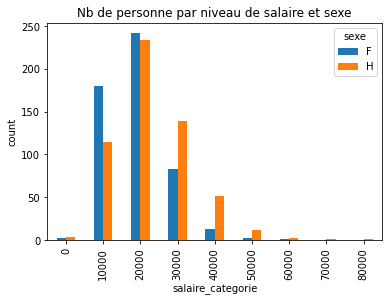

In [132]:
pivot = pd_df.pivot_table(index   = ["salaire_categorie"], 
                          columns = ["sexe"]             ,  
                          values  = "count"              )
pivot.plot(kind="bar", 
           ylabel="count", 
           title="Nb de personne par niveau de salaire et sexe");

## 2.9) compter des éléments dans un group by 

In [87]:
from pyspark.sql import functions as f

In [135]:
from pyspark.sql.functions import collect_list # récupère toutes les data du groupby
from pyspark.sql.functions import collect_set  # récupère les valeurs sans doublons
from pyspark.sql.functions import size         # compte le nombre de valeurs

### 2.9.1) nb de ligne par sexe

In [136]:
ville.groupby("sexe").count().show()

+----+-----+
|sexe|count|
+----+-----+
|   F|  523|
|   H|  560|
+----+-----+



In [93]:
ville.groupBy("sexe").agg(size(collect_list("sexe"))).show()

+----+------------------------+
|sexe|size(collect_list(sexe))|
+----+------------------------+
|   F|                     523|
|   H|                     560|
+----+------------------------+



### 2.9.2) nb de sexe different par tranche salariale

In [137]:
ville.groupBy("salaire_categorie").agg(size(collect_set("sexe"))).show()

+-----------------+-----------------------+
|salaire_categorie|size(collect_set(sexe))|
+-----------------+-----------------------+
|            30000|                      2|
|            10000|                      2|
|            60000|                      2|
|            20000|                      2|
|            80000|                      1|
|            50000|                      2|
|            70000|                      1|
|            40000|                      2|
|                0|                      2|
+-----------------+-----------------------+



#### Exo : trouver les sexes des catégories 80000 et 70000

##### avec where

In [142]:
ville.where("salaire_categorie = 80000").select("sexe").show()

+----+
|sexe|
+----+
|   H|
+----+



###### where + or

In [145]:
colonnes_voulues = ["sexe", "salaire_categorie"]
ville.where("salaire_categorie = 80000 or salaire_categorie = 70000 ").select(colonnes_voulues).show()

+----+-----------------+
|sexe|salaire_categorie|
+----+-----------------+
|   H|            70000|
|   H|            80000|
+----+-----------------+



###### collect_set

In [150]:
aggregated = ville.groupBy("salaire_categorie").agg(collect_set("sexe"))
aggregated = aggregated.sort("salaire_categorie")
aggregated.show()

+-----------------+-----------------+
|salaire_categorie|collect_set(sexe)|
+-----------------+-----------------+
|                0|           [F, H]|
|            10000|           [F, H]|
|            20000|           [F, H]|
|            30000|           [F, H]|
|            40000|           [F, H]|
|            50000|           [F, H]|
|            60000|           [F, H]|
|            70000|              [H]|
|            80000|              [H]|
+-----------------+-----------------+



### 2.9.3) nb de categorie de salaire par sexe

In [153]:
ville.groupby("sexe").agg(size(collect_set("salaire_categorie"))).show()

+----+------------------------------------+
|sexe|size(collect_set(salaire_categorie))|
+----+------------------------------------+
|   F|                                   7|
|   H|                                   9|
+----+------------------------------------+



# 3) calculer des quantiles 

## 3.1) on recharge la base, en demandant une détection automatique des types 

In [154]:
ville.dtypes

[('id', 'string'),
 ('vitesse_a_pied', 'string'),
 ('vitesse_a_velo', 'string'),
 ('home', 'string'),
 ('travail', 'string'),
 ('sportif', 'string'),
 ('casseur', 'string'),
 ('statut', 'string'),
 ('salaire', 'string'),
 ('sexe', 'string'),
 ('age', 'string'),
 ('sportivite', 'string'),
 ('velo_perf_minimale', 'string'),
 ('salaire_float', 'double'),
 ('salaire_int', 'string'),
 ('salaire_categorie', 'int')]

##### inferschema = True

In [10]:
ville = spark.read.load("./ville_1.csv"      , 
                        format      = "csv"  , 
                        header      = True   ,
                        inferSchema = "True" )

In [11]:
ville.dtypes

[('id', 'int'),
 ('vitesse_a_pied', 'double'),
 ('vitesse_a_velo', 'double'),
 ('home', 'string'),
 ('travail', 'string'),
 ('sportif', 'boolean'),
 ('casseur', 'boolean'),
 ('statut', 'string'),
 ('salaire', 'double'),
 ('sexe', 'string'),
 ('age', 'int'),
 ('sportivite', 'double'),
 ('velo_perf_minimale', 'double')]

In [12]:
from time import time

In [13]:
def calcul_quantile(df,colonne, erreur_acceptee, ):
    debut           = time()
    quantile_voulus = [0.25, 0.5, 0.75]
    resultat        = df.approxQuantile(colonne, quantile_voulus, erreur_acceptee)
    fin             = time()
    delais          = fin - debut
    print(f"delais = {delais:.4} sec,  quantiles ={resultat}")

In [14]:
ville.approxQuantile("vitesse_a_pied", [0.25, 0.5, 0.75], 0.05)

[0.15731508875721376, 0.47702125792661454, 0.7628650188339616]

In [198]:
ville.approxQuantile("vitesse_a_pied", [0.25, 0.5, 0.75], 0.1)

[0.20643872526718415, 0.3671582228796071, 0.6907825448897998]

In [199]:
ville.approxQuantile("vitesse_a_pied", [0.25, 0.5, 0.75], 0)

[0.14653134035123255, 0.49033450127802747, 0.8383862769558276]

In [200]:
ville.count()

1083

In [15]:
big_df = ville
for i in range(10):
    big_df = big_df.union(big_df)

In [202]:
big_df.count()

1108992

In [205]:
big_df.is_cached

True

In [16]:
big_df.cache()

DataFrame[id: int, vitesse_a_pied: double, vitesse_a_velo: double, home: string, travail: string, sportif: boolean, casseur: boolean, statut: string, salaire: double, sexe: string, age: int, sportivite: double, velo_perf_minimale: double]

In [207]:
big_df.is_cached

True

In [17]:
big_df.count()

1108992

In [178]:
big_df.count()

1108992

In [209]:
for erreur in range(0,10, 1):
    print("erreur=", erreur)
    calcul_quantile(big_df, "vitesse_a_pied", erreur/10)

erreur= 0
delais = 32.6 sec,  quantiles =[0.14653134035123255, 0.49033450127802747, 0.8383862769558276]
erreur= 1
delais = 22.64 sec,  quantiles =[0.20643872526718415, 0.3671582228796071, 0.6907825448897998]
erreur= 2
delais = 19.15 sec,  quantiles =[0.08328838658186277, 0.40025854209141, 0.6259695740470621]
erreur= 3
delais = 19.51 sec,  quantiles =[0.02, 0.3615980311120377, 3.7766588011416977]
erreur= 4
delais = 19.93 sec,  quantiles =[0.02, 0.04615889177040968, 3.7766588011416977]
erreur= 5
delais = 23.85 sec,  quantiles =[0.02, 0.02, 3.7766588011416977]
erreur= 6
delais = 18.01 sec,  quantiles =[0.02, 0.02, 3.7766588011416977]
erreur= 7
delais = 24.1 sec,  quantiles =[0.02, 0.02, 3.7766588011416977]
erreur= 8
delais = 14.68 sec,  quantiles =[0.02, 0.02, 0.02]
erreur= 9
delais = 14.48 sec,  quantiles =[0.02, 0.02, 0.02]


In [ ]:
calcul_quantile(big_df, "vitesse_a_pied", 10)

In [ ]:
big_df.approxQuantile()

In [212]:
import sys

In [214]:
sys.version

'3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]'

# 4) diverses fonctions

## 4.1) récupérer des noms de colonne via une expression régulière

In [19]:
ville.columns

['id',
 'vitesse_a_pied',
 'vitesse_a_velo',
 'home',
 'travail',
 'sportif',
 'casseur',
 'statut',
 'salaire',
 'sexe',
 'age',
 'sportivite',
 'velo_perf_minimale']

In [30]:
regex = '`vitesse.*`'
ville.select(ville.colRegex(regex)).show()

+--------------------+-------------------+
|      vitesse_a_pied|     vitesse_a_velo|
+--------------------+-------------------+
|                0.02|               0.05|
| 0.14974625830876215|0.37436564577190534|
|  0.6309711587089704| 1.6825897565572543|
| 0.04009596300649916|0.10692256801733109|
|                0.02|               0.05|
|  0.8655449921165502|  2.308119978977467|
|  0.5879992290928728| 1.4699980727321822|
|  0.8306610123216782|  2.215096032857809|
| 0.12542885835859416| 0.3344769556229178|
|0.030000000000000006|               0.08|
|0.030000000000000006|               0.08|
|                0.02|               0.05|
|  1.4342769187788869| 3.8247384500770316|
|  0.6272243144514219| 1.5680607861285547|
|  0.5056944896192869|  1.348518638984765|
|  0.3167145553844886| 0.7917863884612215|
|  0.3358134613272747| 0.8955025635393993|
|0.030000000000000006|               0.08|
|    0.94148024700412|  2.510613992010987|
|0.030000000000000006|               0.08|
+----------

## exo : comment caster les salaires en int (création de nouvelle colonne)

In [33]:
from pyspark.sql.types import *

In [34]:
ville = ville.withColumn("salaire_int", ville.salaire.cast(DoubleType()))

In [35]:
regex = '`salaire.*`'
ville.select(ville.colRegex(regex)).show()

+------------------+------------------+
|           salaire|       salaire_int|
+------------------+------------------+
|29800.610034665042|29800.610034665042|
| 23595.44383981423| 23595.44383981423|
| 18530.14776280135| 18530.14776280135|
| 18997.60281005325| 18997.60281005325|
|23618.479750220806|23618.479750220806|
| 19082.30894283764| 19082.30894283764|
|21782.945135729053|21782.945135729053|
|41451.270468058414|41451.270468058414|
| 22025.17074872747| 22025.17074872747|
| 38211.06301426453| 38211.06301426453|
|32384.038031466876|32384.038031466876|
|18155.392787144123|18155.392787144123|
| 34479.64091466565| 34479.64091466565|
|17894.342734488273|17894.342734488273|
|15272.646527406627|15272.646527406627|
| 32340.37164134604| 32340.37164134604|
|30332.817374659553|30332.817374659553|
| 11069.70965021214| 11069.70965021214|
|32542.663936348865|32542.663936348865|
| 31264.86511628485| 31264.86511628485|
+------------------+------------------+
only showing top 20 rows



## 4.2) Covariance

In [36]:
ville.columns

['id',
 'vitesse_a_pied',
 'vitesse_a_velo',
 'home',
 'travail',
 'sportif',
 'casseur',
 'statut',
 'salaire',
 'sexe',
 'age',
 'sportivite',
 'velo_perf_minimale',
 'salaire_int']

In [37]:
ville.cov("age", "vitesse_a_velo")

-0.4752524914308339

In [38]:
ville.cov("vitesse_a_pied", "vitesse_a_velo")

0.6699079708245432

## 4.3) drop_duplicates => suppression de doublons

In [39]:
colonnes_a_tester = ["sexe", "age"]
ville.drop_duplicates(colonnes_a_tester).count()

140

## 4.4) exceptAll => enlever les lignes qui sont dans un autre ensemble

In [42]:
dix_pct = ville.sample(False, 0.1)

In [45]:
dix_pct.count()

105

In [46]:
ville.exceptAll(dix_pct).count()

978

In [44]:
ville.count()

1083

## 4.5) fillna => remplir les vides

In [48]:
ville.fillna("TBD", subset=colonnes_a_tester)

DataFrame[id: int, vitesse_a_pied: double, vitesse_a_velo: double, home: string, travail: string, sportif: boolean, casseur: boolean, statut: string, salaire: double, sexe: string, age: int, sportivite: double, velo_perf_minimale: double, salaire_int: double]

## 4.6) printschema : donne de l'info sur la dataframe

In [49]:
ville.printSchema()

root
 |-- id: integer (nullable = true)
 |-- vitesse_a_pied: double (nullable = true)
 |-- vitesse_a_velo: double (nullable = true)
 |-- home: string (nullable = true)
 |-- travail: string (nullable = true)
 |-- sportif: boolean (nullable = true)
 |-- casseur: boolean (nullable = true)
 |-- statut: string (nullable = true)
 |-- salaire: double (nullable = true)
 |-- sexe: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- sportivite: double (nullable = true)
 |-- velo_perf_minimale: double (nullable = true)
 |-- salaire_int: double (nullable = true)



## 4.7) statistiques automatiques sur des colonnes

In [55]:
ville.summary(["count", "max", "min"]).show(vertical=True)

-RECORD 0----------------------------------
 summary            | count                
 id                 | 1083                 
 vitesse_a_pied     | 1083                 
 vitesse_a_velo     | 1083                 
 home               | 1083                 
 travail            | 1083                 
 statut             | 1083                 
 salaire            | 1083                 
 sexe               | 1083                 
 age                | 1083                 
 sportivite         | 1083                 
 velo_perf_minimale | 1083                 
 salaire_int        | 1083                 
-RECORD 1----------------------------------
 summary            | max                  
 id                 | 6333                 
 vitesse_a_pied     | 3.7766588011416977   
 vitesse_a_velo     | 10.07109013637786    
 home               | (lon:9.99 lat:17.81) 
 travail            | (lon:9.90 lat:0.36)  
 statut             | éboueur              
 salaire            | 80017.4585

## 4.8) Renommer une colonne

In [58]:
ancien_nom = "salaire_int"
nouveau_nom = "salaire_entier"
ville.withColumnRenamed(ancien_nom, nouveau_nom).columns

['id',
 'vitesse_a_pied',
 'vitesse_a_velo',
 'home',
 'travail',
 'sportif',
 'casseur',
 'statut',
 'salaire',
 'sexe',
 'age',
 'sportivite',
 'velo_perf_minimale',
 'salaire_entier']

## 4.9) calculer un arrondi d'une colonne

In [59]:
ville.dtypes

[('id', 'int'),
 ('vitesse_a_pied', 'double'),
 ('vitesse_a_velo', 'double'),
 ('home', 'string'),
 ('travail', 'string'),
 ('sportif', 'boolean'),
 ('casseur', 'boolean'),
 ('statut', 'string'),
 ('salaire', 'double'),
 ('sexe', 'string'),
 ('age', 'int'),
 ('sportivite', 'double'),
 ('velo_perf_minimale', 'double'),
 ('salaire_int', 'double')]

In [60]:
from pyspark.sql import functions as F

In [62]:
ville.withColumn("test", F.bround("salaire", 0)).take(3)

[Row(id=5251, vitesse_a_pied=0.02, vitesse_a_velo=0.05, home='(lon:26.60 lat:28.13)', travail='(lon:21.08 lat:14.11)', sportif=False, casseur=False, statut='reserviste', salaire=29800.610034665042, sexe='F', age=18, sportivite=0.1, velo_perf_minimale=0.4, salaire_int=29800.610034665042, test=29801.0),
 Row(id=5252, vitesse_a_pied=0.14974625830876215, vitesse_a_velo=0.37436564577190534, home='(lon:0.26 lat:42.61)', travail='(lon:36.35 lat:33.28)', sportif=False, casseur=False, statut='professeur', salaire=23595.44383981423, sexe='F', age=28, sportivite=0.7487312915438107, velo_perf_minimale=0.4, salaire_int=23595.44383981423, test=23595.0),
 Row(id=5253, vitesse_a_pied=0.6309711587089704, vitesse_a_velo=1.6825897565572543, home='(lon:3.34 lat:13.95)', travail='(lon:24.75 lat:48.15)', sportif=False, casseur=False, statut='technicien_de_surface', salaire=18530.14776280135, sexe='H', age=65, sportivite=2.103237195696568, velo_perf_minimale=0.4, salaire_int=18530.14776280135, test=18530.0)]

In [69]:
ville.show(3, vertical=True)

-RECORD 0----------------------------------
 id                 | 5251                 
 vitesse_a_pied     | 0.02                 
 vitesse_a_velo     | 0.05                 
 home               | (lon:26.60 lat:28... 
 travail            | (lon:21.08 lat:14... 
 sportif            | false                
 casseur            | false                
 statut             | reserviste           
 salaire            | 29800.610034665042   
 sexe               | F                    
 age                | 18                   
 sportivite         | 0.1                  
 velo_perf_minimale | 0.4                  
 salaire_int        | 29800.610034665042   
-RECORD 1----------------------------------
 id                 | 5252                 
 vitesse_a_pied     | 0.14974625830876215  
 vitesse_a_velo     | 0.37436564577190534  
 home               | (lon:0.26 lat:42.61) 
 travail            | (lon:36.35 lat:33... 
 sportif            | false                
 casseur            | false     

# 5) back to the "cycliste" file

In [71]:
!head cycliste_debug.csv

cycliste,n_message,time,message
cycliste_azey2,0442, 1486038900.39,velo rendu sur la station azgb6 ( a la maison = False) (elem de station_travail)
cycliste_azey2,0441, 1486038900.39,impossible de rendre sur ,aesjv ( a la maison = False)
cycliste_azey2,0440, 1486038900.38,self.a_la_maison = False
cycliste_azey2,0439, 1486038897.85,True a pris le velo velo_aelcv_1486034979.01 sur la station ars89
cycliste_azefc,0616, 1486038900.41,impossible de rendre sur ,ars89 ( a la maison = True)
cycliste_azefc,0615, 1486038900.41,impossible de rendre sur ,aesjv ( a la maison = True)
cycliste_azei1,0455, 1486038900.42,velo rendu sur la station arfh7 ( a la maison = False) (elem de station_travail)
cycliste_azei1,0454, 1486038900.42,impossible de rendre sur ,artl6 ( a la maison = False)
cycliste_azei1,0453, 1486038900.42,impossible de rendre sur ,azop9 ( a la maison = False)


In [74]:
cycliste = spark.read.format("csv").option("header", "true").load("./cycliste_debug.csv", inferschema=True)

In [75]:
cycliste.dtypes

[('cycliste', 'string'),
 ('n_message', 'int'),
 ('time', 'double'),
 ('message', 'string')]

In [76]:
cycliste  = cycliste.withColumnRenamed("time", "timestamp")

In [77]:
cycliste.printSchema()

root
 |-- cycliste: string (nullable = true)
 |-- n_message: integer (nullable = true)
 |-- timestamp: double (nullable = true)
 |-- message: string (nullable = true)



In [79]:
cycliste.select("timestamp").drop_duplicates().count()

101774

In [80]:
# Exo : transformer les timestamp en date 

In [89]:
from pyspark.sql.functions import udf
from pyspark.sql.types import TimestampType

### Décoration d'une fonction python avec @udf

In [86]:
@udf(returnType=TimestampType())
def transform_timestamp_in_date(timestamp):
    import datetime
    return datetime.datetime.fromtimestamp(timestamp)    

In [88]:
cycliste.withColumn("date", transform_timestamp_in_date("timestamp") ).show(3, vertical=True)

-RECORD 0-------------------------
 cycliste  | cycliste_azey2       
 n_message | 442                  
 timestamp | 1.48603890039E9      
 message   | velo rendu sur la... 
 date      | 2017-02-02 13:35:... 
-RECORD 1-------------------------
 cycliste  | cycliste_azey2       
 n_message | 441                  
 timestamp | 1.48603890039E9      
 message   | impossible de ren... 
 date      | 2017-02-02 13:35:... 
-RECORD 2-------------------------
 cycliste  | cycliste_azey2       
 n_message | 440                  
 timestamp | 1.48603890038E9      
 message   | self.a_la_maison ... 
 date      | 2017-02-02 13:35:... 
only showing top 3 rows

